# Housing: Price Prediction

Here we are building a predictive model which predicts the price of houses with the available independent variables. This will help the management to understand the pricing dynamics of a new market.

In [162]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings("ignore")
import pickle

# Examining the data:

In [163]:
data=pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [120]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
1167,617,60,RL,NaN,7861,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,183200


In [4]:
data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
847,1294,60,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,3,2006,WD,Normal,162900
108,632,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,209500
740,928,60,RL,NaN,9900,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,4,2008,WD,Normal,176000
449,646,20,RL,NaN,10530,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,143250
185,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000


We can see that by the above dataframes there are both numeric and categorical values with 81 columns. And also there are some NaN values.

# Exploratory Data Analysis:

In [5]:
data.shape

(1168, 81)

The data consists of 1168 rows and 80 features plus one target feature.

In [6]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

As we said above we can see that there are 43 categorical feature and 38 numerical/continuous feature.

In [8]:
#datatypes of the features
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [9]:
#checking the null values
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

So there are many null values.

Let us claculate the percentage of missing values and how they are affecting our target feature

In [10]:
features_with_nan=[features for features in data.columns if data[features].isnull().sum()>1]

for feature in features_with_nan:
    print(feature,np.round(data[feature].isnull().mean(),3), '% missing values')

LotFrontage 0.183 % missing values
Alley 0.934 % missing values
MasVnrType 0.006 % missing values
MasVnrArea 0.006 % missing values
BsmtQual 0.026 % missing values
BsmtCond 0.026 % missing values
BsmtExposure 0.027 % missing values
BsmtFinType1 0.026 % missing values
BsmtFinType2 0.027 % missing values
FireplaceQu 0.472 % missing values
GarageType 0.055 % missing values
GarageYrBlt 0.055 % missing values
GarageFinish 0.055 % missing values
GarageQual 0.055 % missing values
GarageCond 0.055 % missing values
PoolQC 0.994 % missing values
Fence 0.797 % missing values
MiscFeature 0.962 % missing values


There are less percentage of missing values in some features and in some features like Alley,PoolQC,Fence,MiscFeature the missing value percentage is very high so that we can drop them as they do not contributes the target column in the great sense.

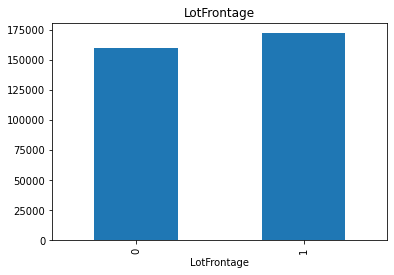

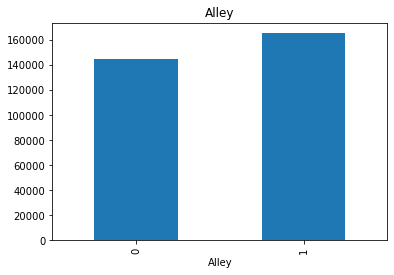

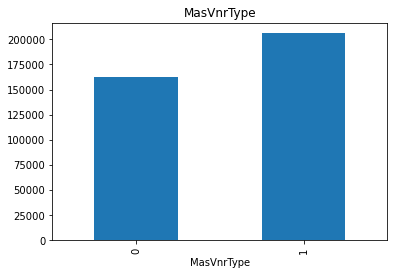

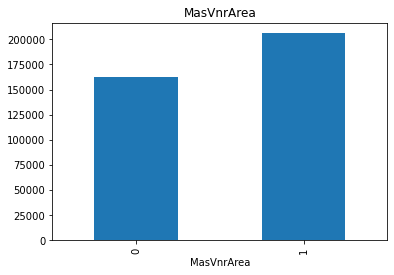

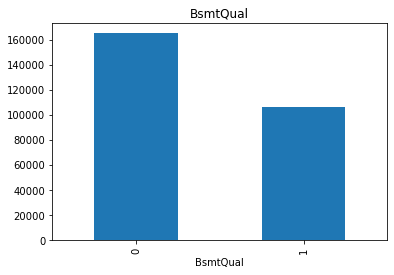

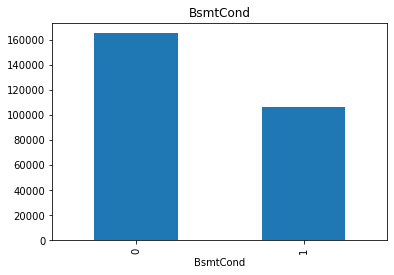

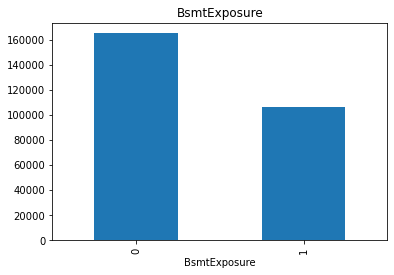

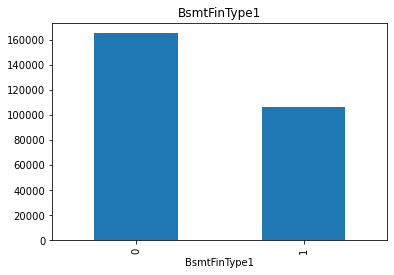

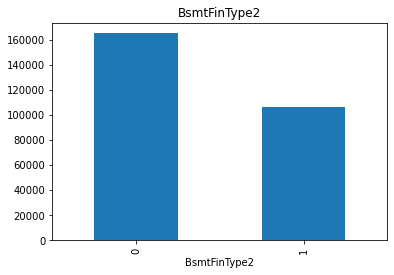

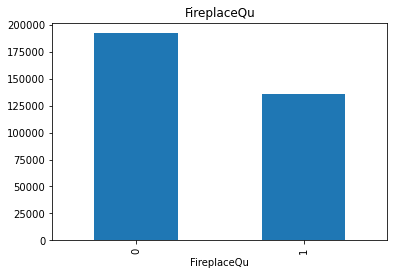

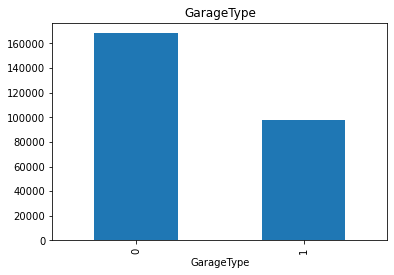

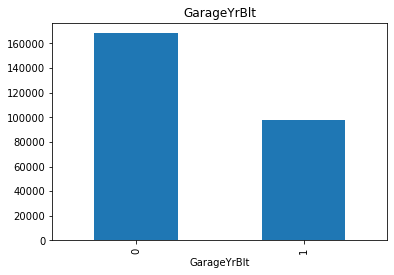

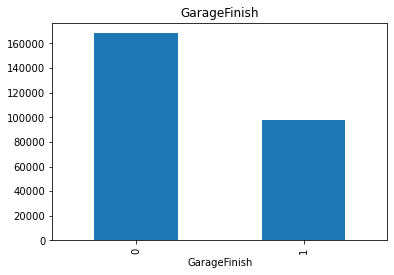

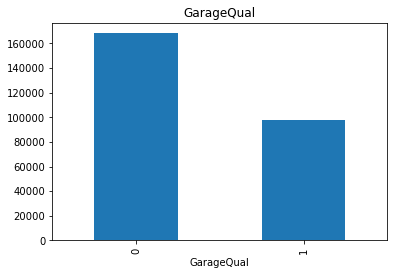

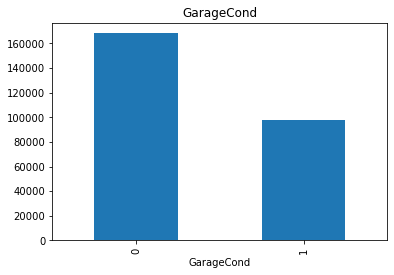

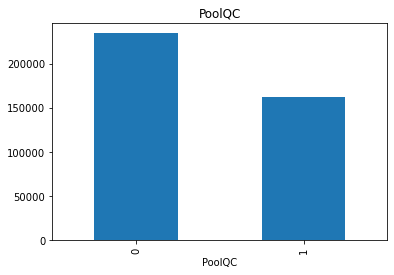

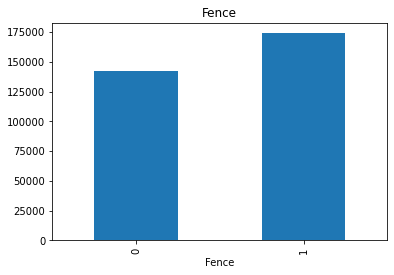

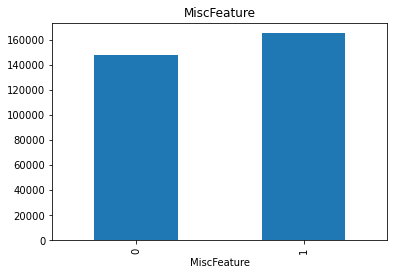

In [11]:
#let us see how these missing values effects target feature
for feature in features_with_nan:
    data1=data.copy()
    
    data1[feature]=np.where(data1[feature].isnull(), 1, 0)
    
    data1.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Since the nan values which  has higher median SalesPrice are playing a major role.

Here with the relation between the missing values and the dependent variable is clearly visible. So we need to replace these nan values with something meaningful which we will do in feature engineering section.

<AxesSubplot:xlabel='Id', ylabel='SalePrice'>

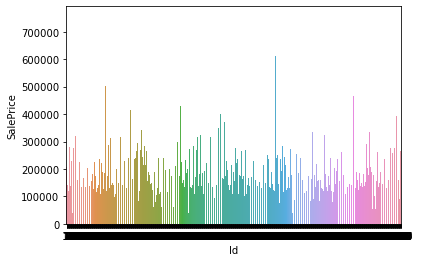

In [12]:
sns.barplot(x='Id',y='SalePrice',data=data)

Since Id is a unique for every value it is not much required to predict the

In [164]:
data.drop(['Id','Alley','PoolQC','MiscFeature','Fence'],axis=1,inplace=True)

In [165]:
continuous_data=data.select_dtypes("number")
categorical_data=data.select_dtypes("object")
print("Total no. of Continuousdtype columns",len(continuous_data.columns))
print("Total no. of categoricaldtype columns",len(categorical_data.columns))

Total no. of Continuousdtype columns 37
Total no. of categoricaldtype columns 39


In [166]:
year_feature=[feature for feature in continuous_data if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs YearSold')

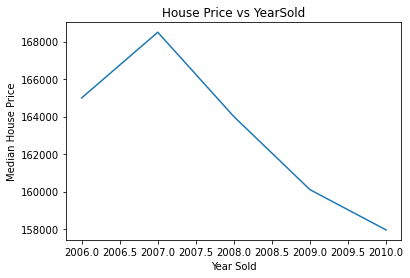

In [16]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

So here as the year increases the median house price is decreasing which is incorrect so let us cross chheck it. 

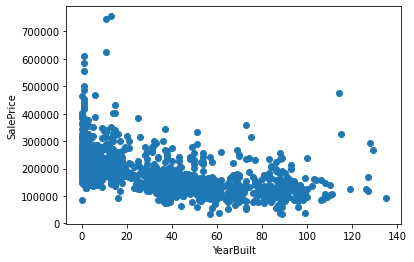

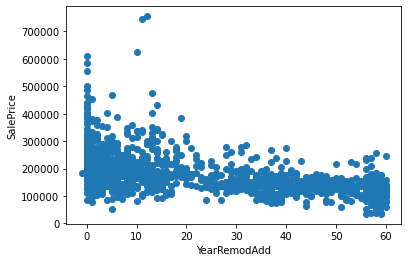

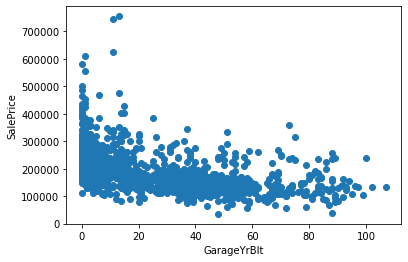

In [17]:
for feature in year_feature:
    if feature!='YrSold':
        data2=data.copy()
        data2[feature]=data2['YrSold']-data2[feature]
        plt.scatter(data2[feature],data2['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

Observations:

1.By observing the first graph we can say that if the house is built 140 years ago then its price is less and between zero to twenty years the price is high.

2.Similar to the first graph if the house remodelled year is more than 10 years there is a decrease in the house price.

3.Even in third graph also increasing year has a increasing price.

So all the three observations suggests that the newer house(which are built or renovated 10-20 year ago)are having highest saleprice.

Now let us see how the categorical and numerical features impacting the SalePrice.

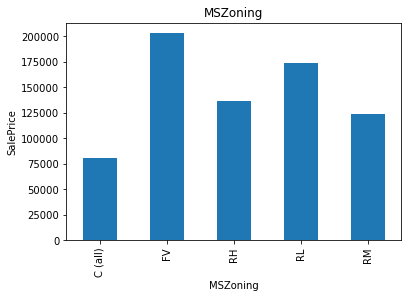

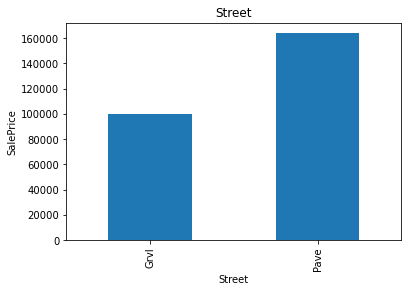

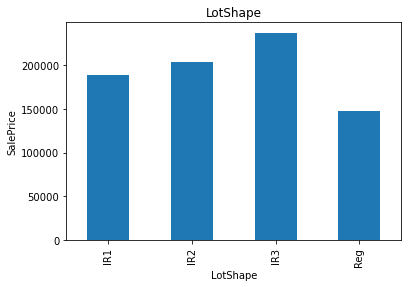

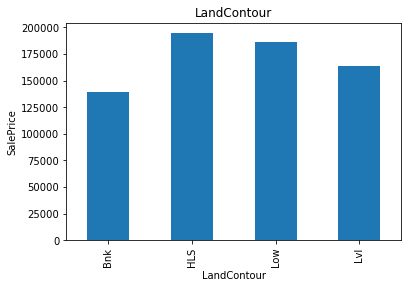

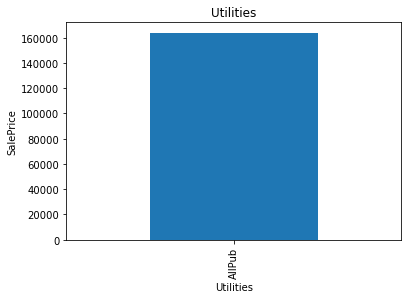

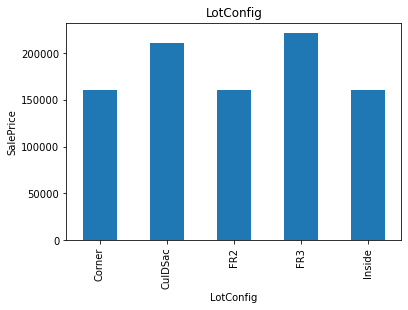

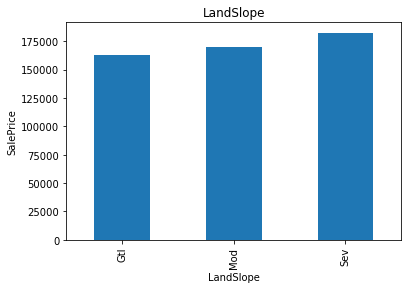

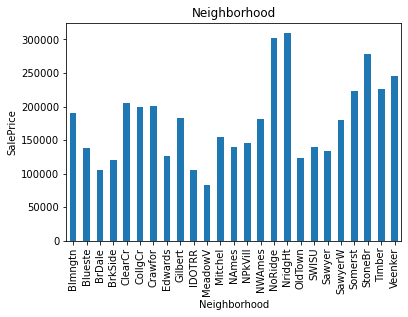

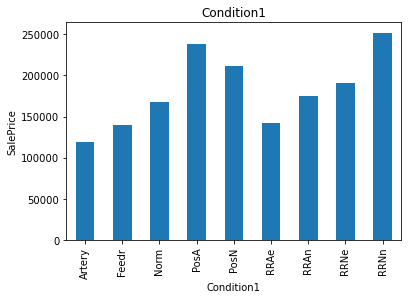

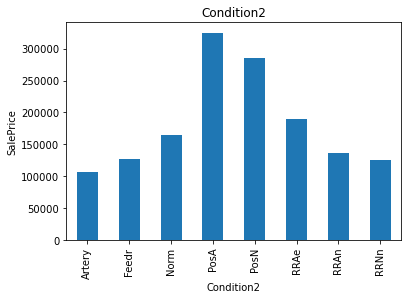

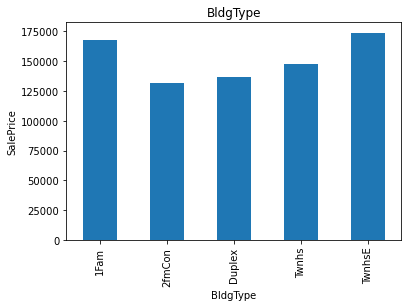

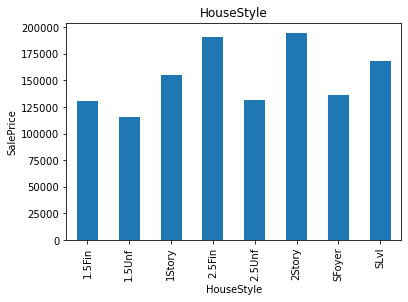

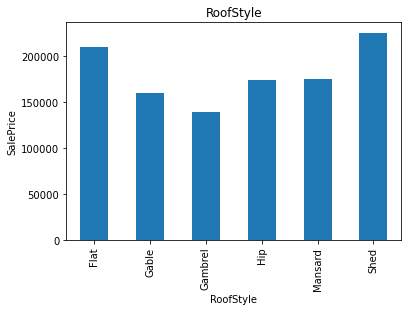

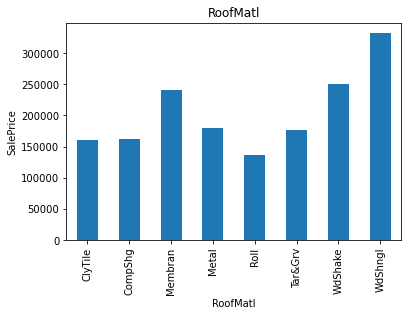

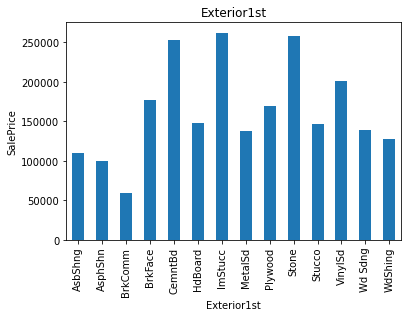

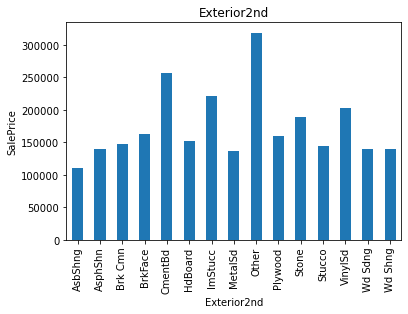

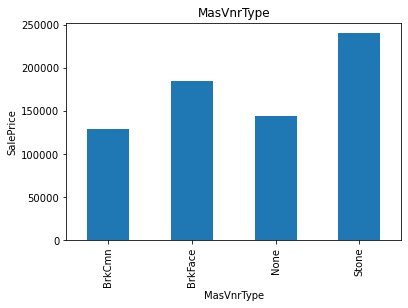

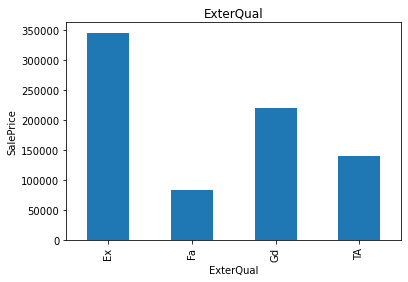

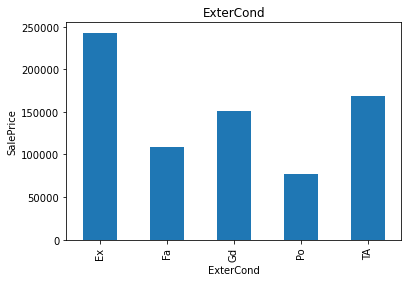

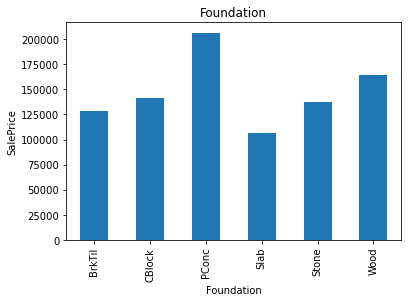

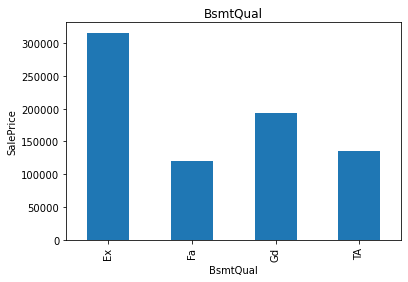

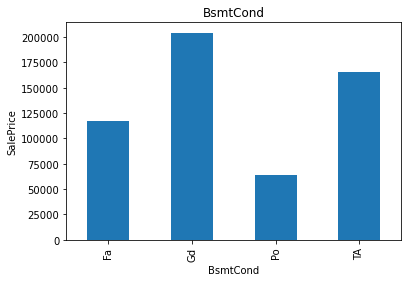

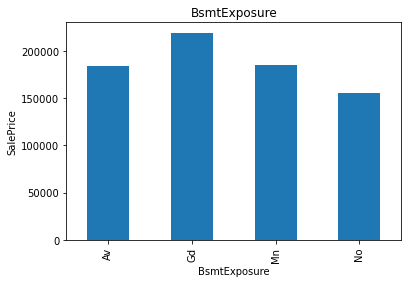

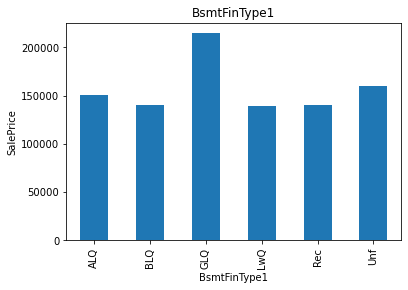

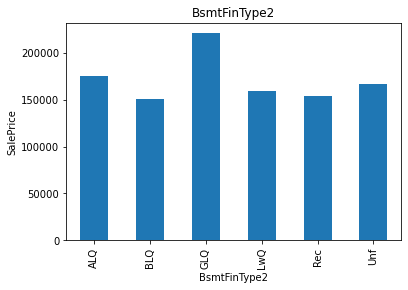

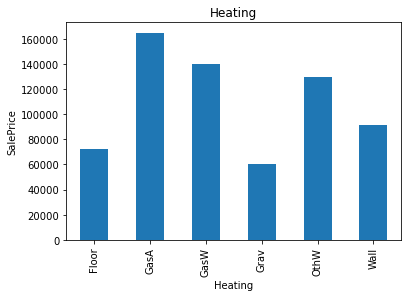

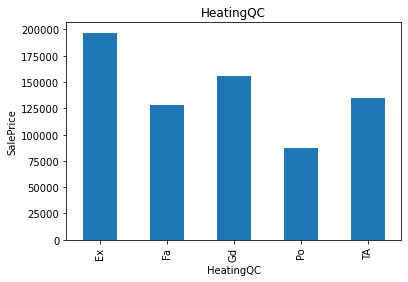

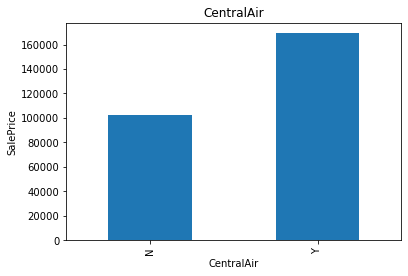

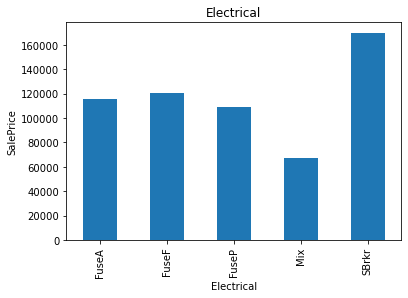

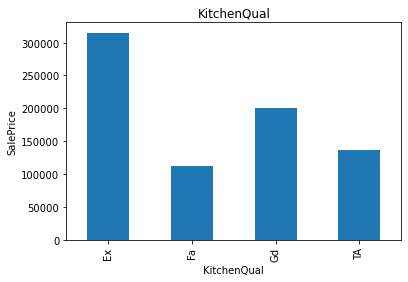

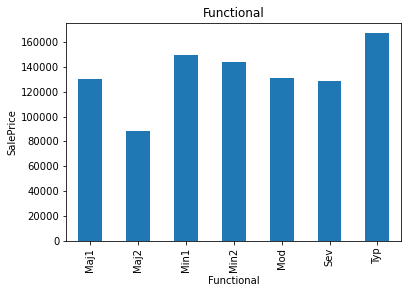

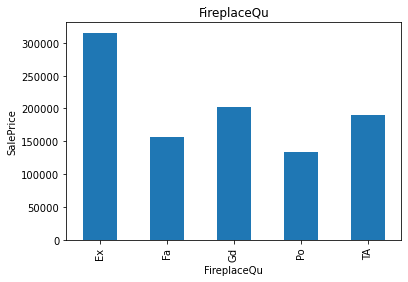

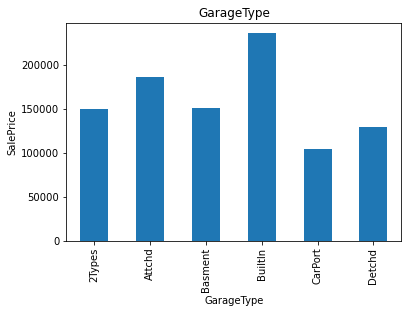

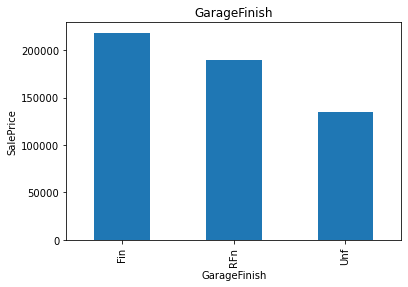

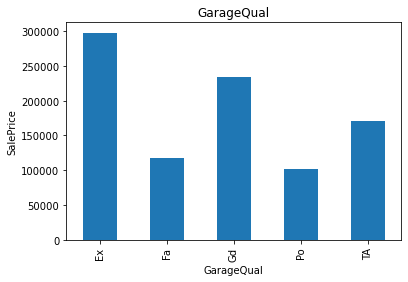

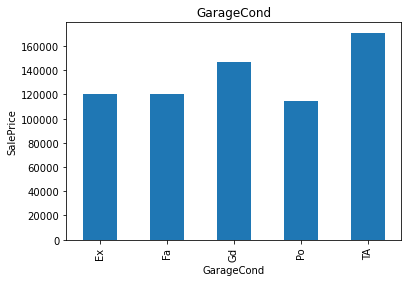

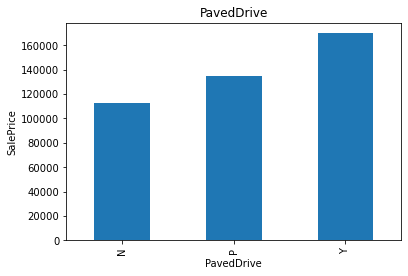

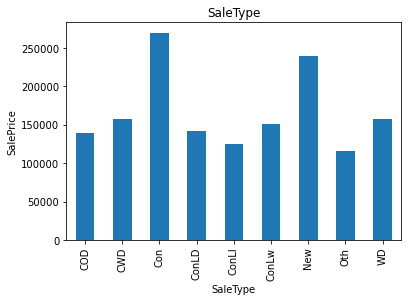

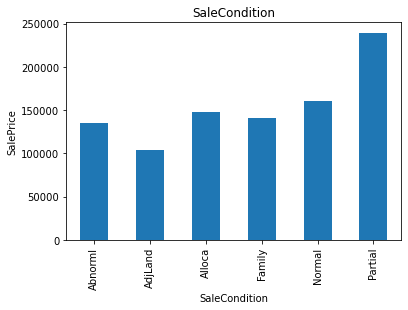

In [18]:
for feature in categorical_data:
    data1=data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

observations:

    1.In MSZoning the floating village residential is having a highest price and followed by Residential Low density.
    2.If the Street has a Pave then the Saleprice is increasing so it has a positive correlation.
    3.LotShape,Lotcontour,LotConfig,LandSlope are also contributing positively to the target feature.
    4. All Utensils are having equal priority and contributing positively tothe target.
    5. The houses near to NorthRidgeHeights are having high SalePrice and the houses near meadow village are having the lowest        price.
    6.The houses associated with new home and houses purchasing via loan are having highest SalePrice.

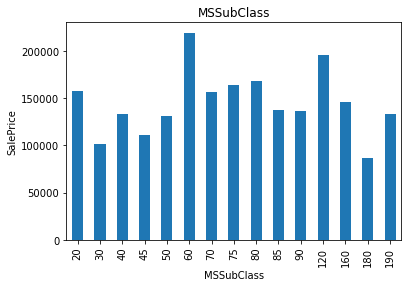

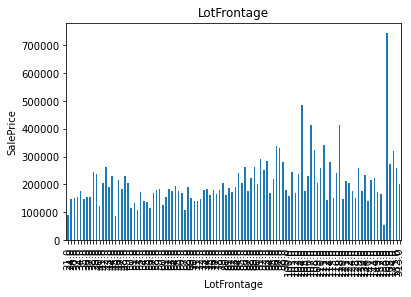

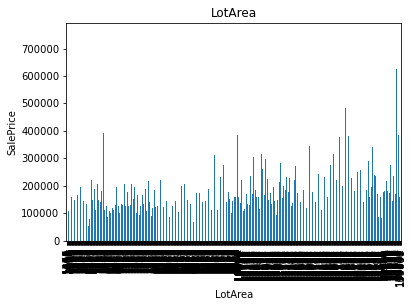

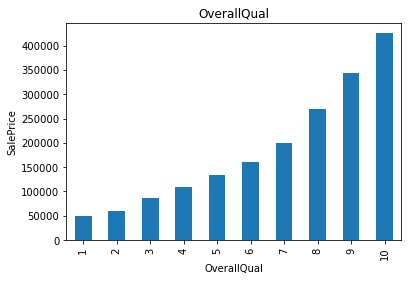

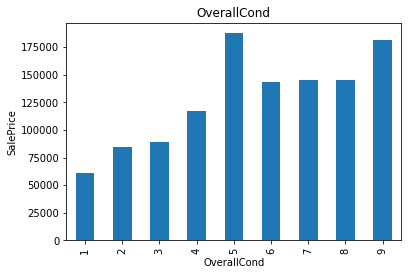

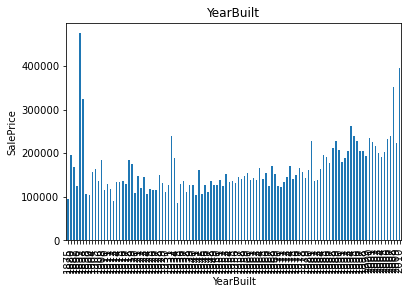

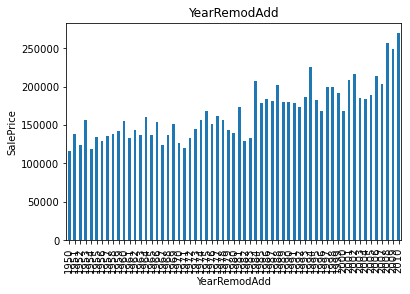

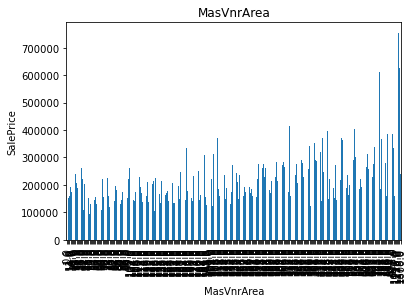

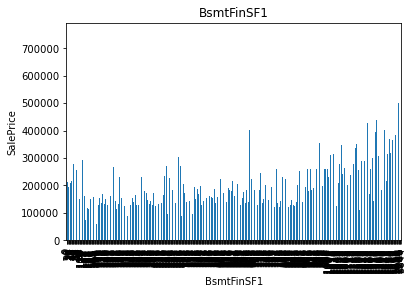

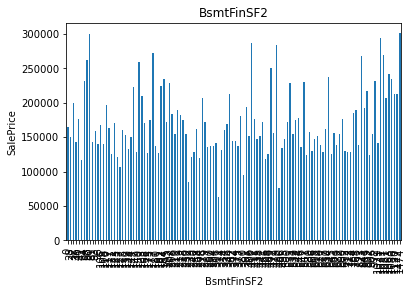

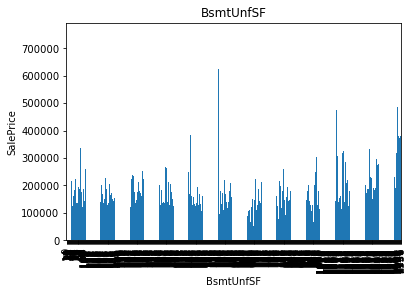

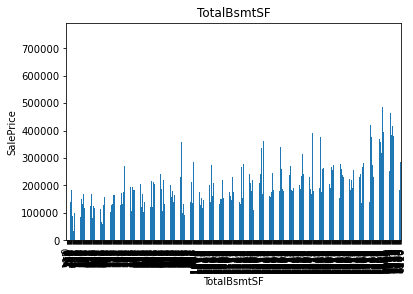

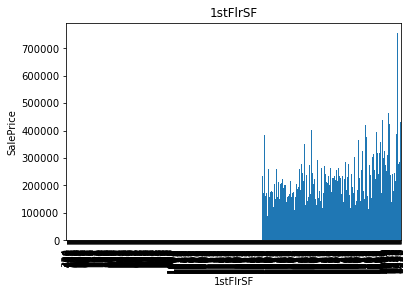

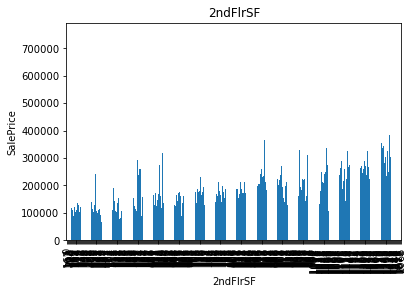

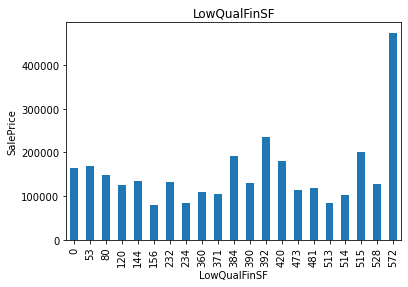

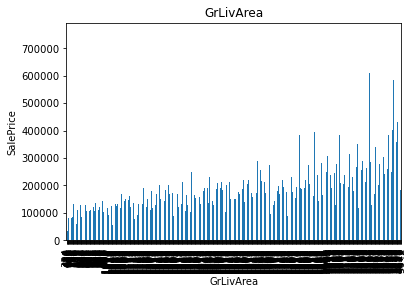

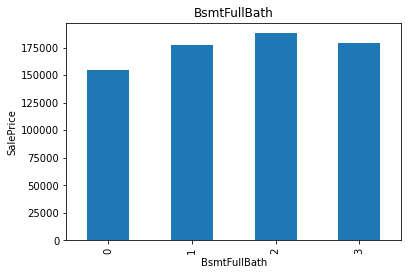

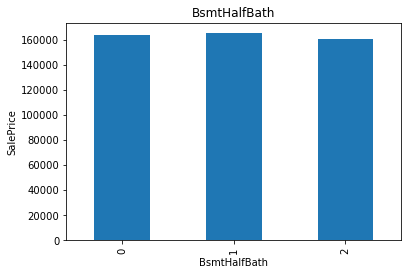

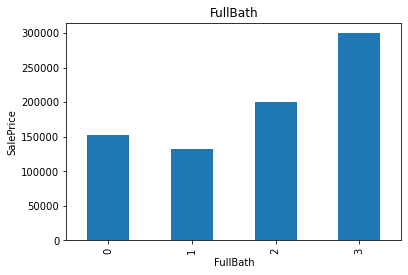

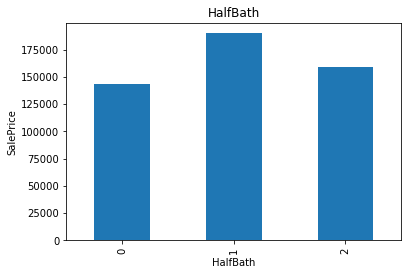

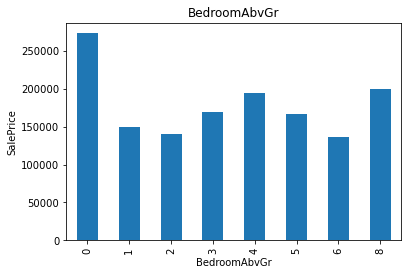

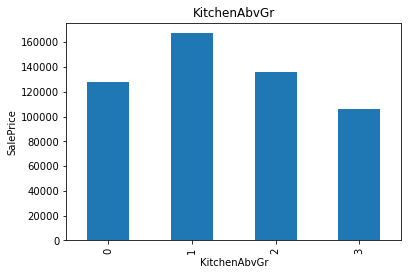

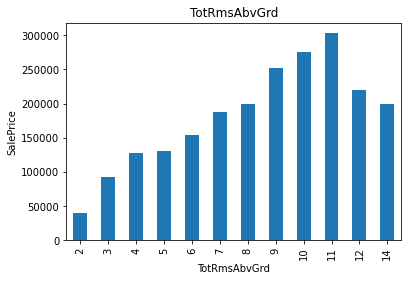

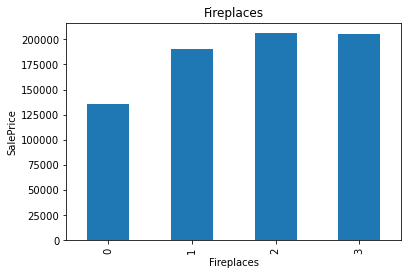

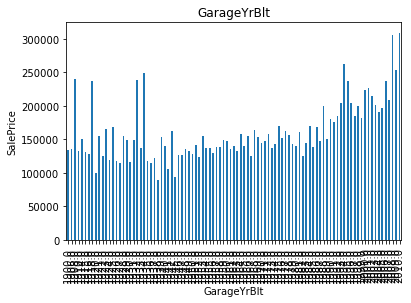

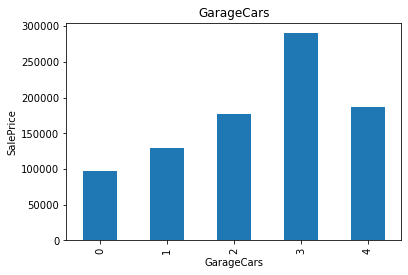

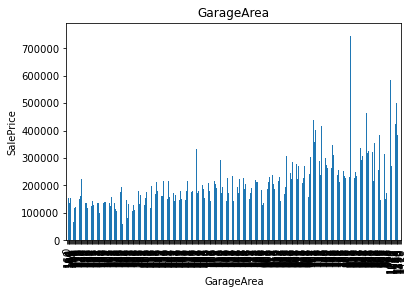

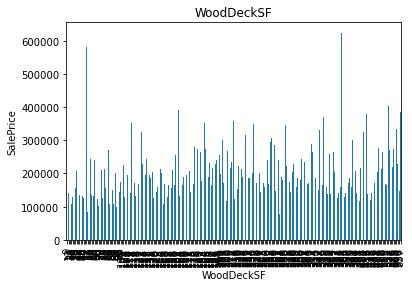

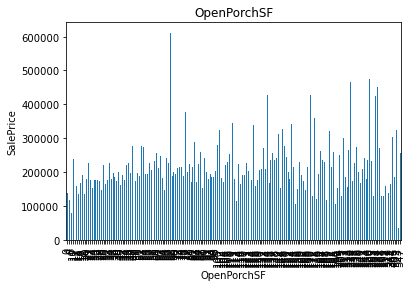

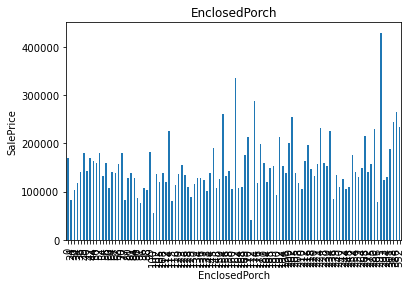

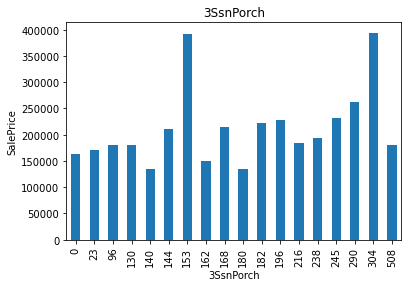

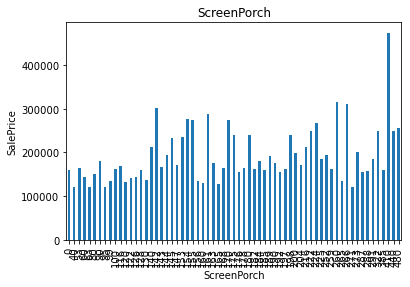

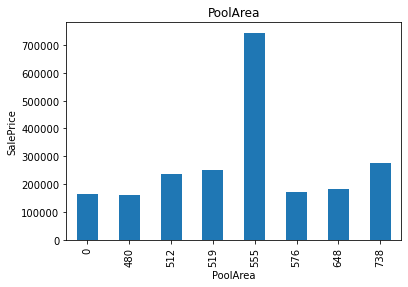

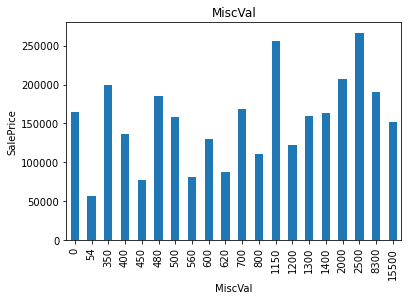

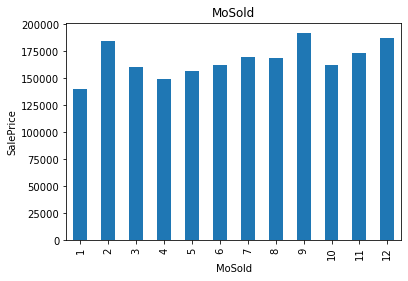

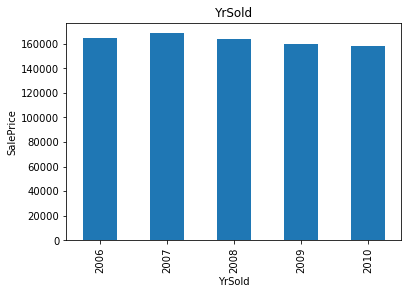

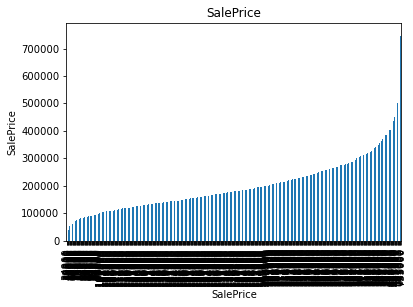

In [19]:
#plotting for the continuous data
for feature in continuous_data:
    data1=data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Let us plot the same numerical features using histogram.

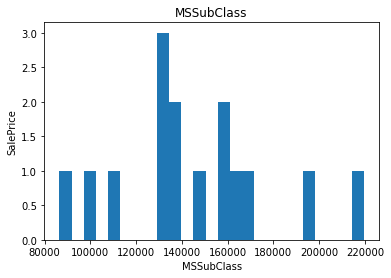

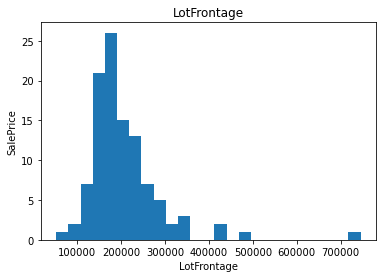

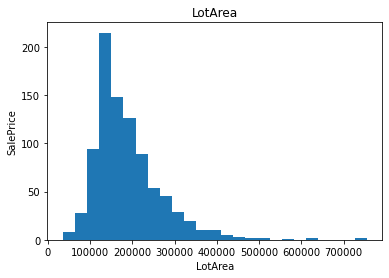

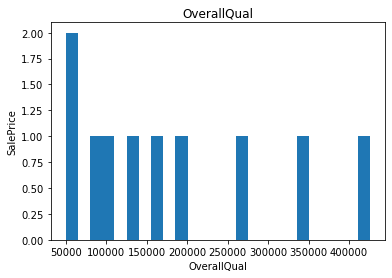

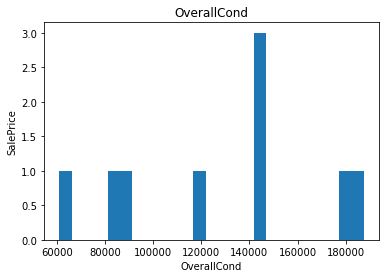

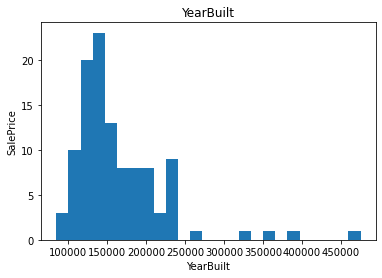

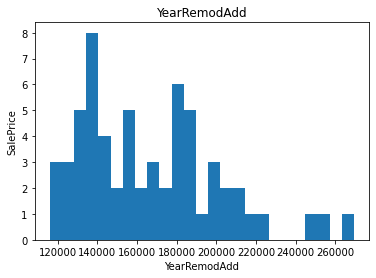

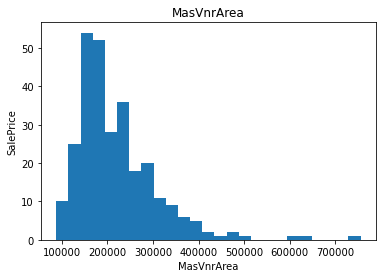

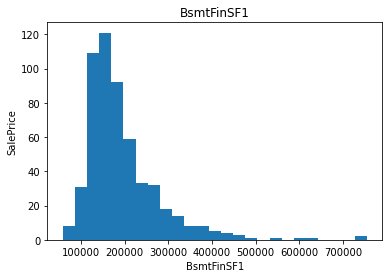

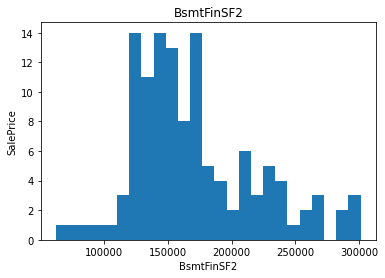

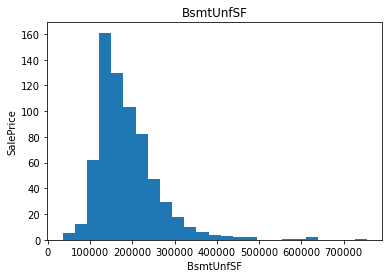

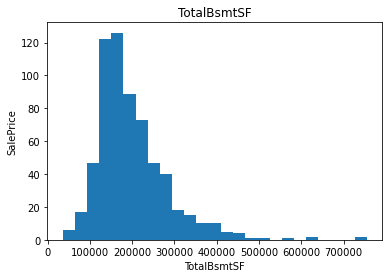

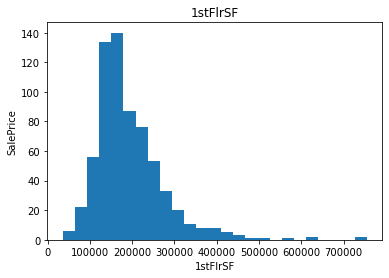

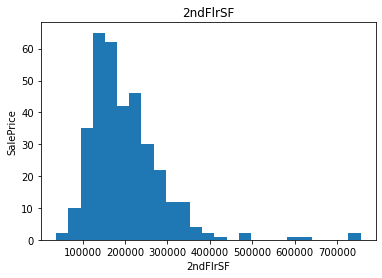

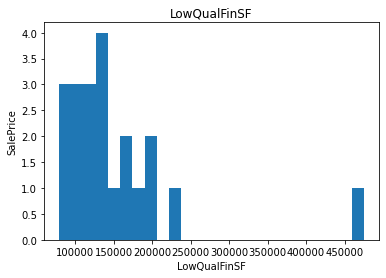

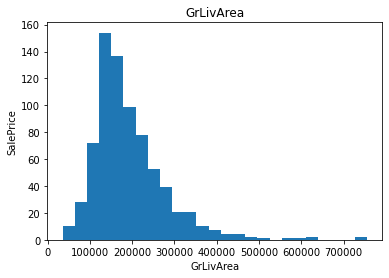

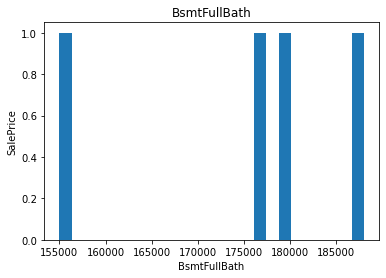

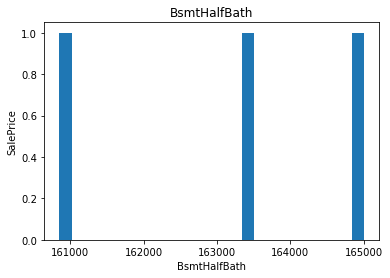

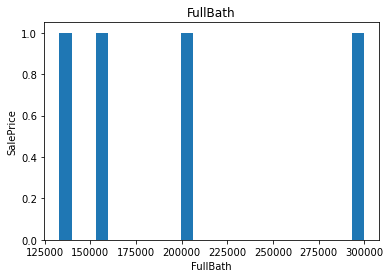

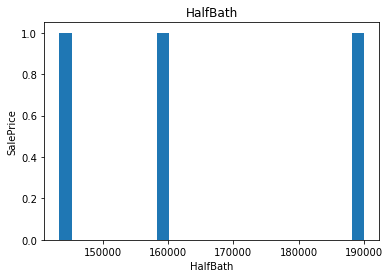

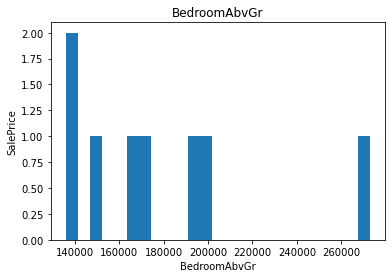

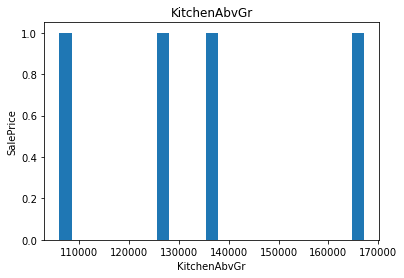

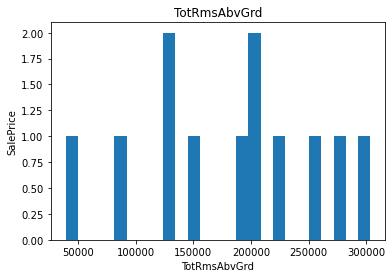

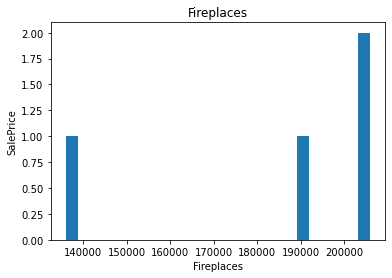

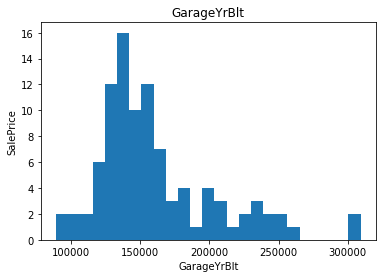

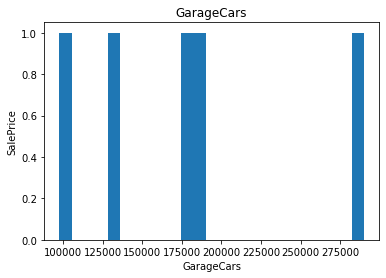

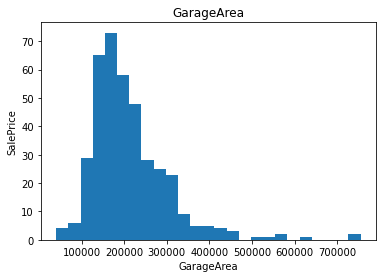

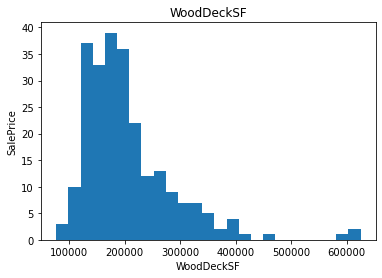

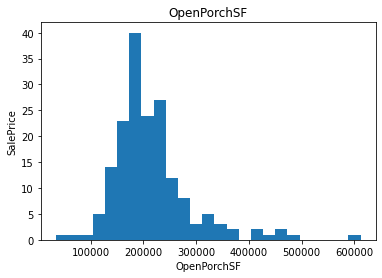

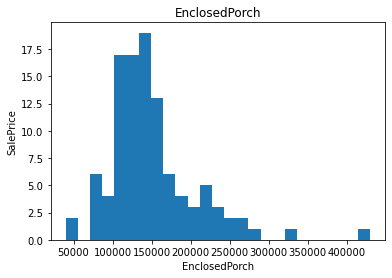

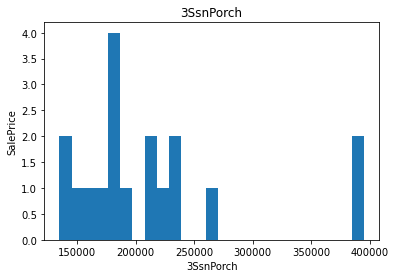

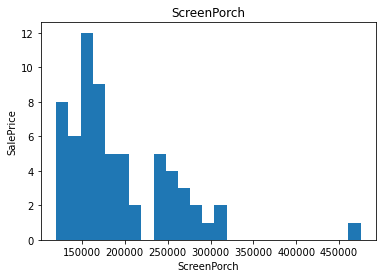

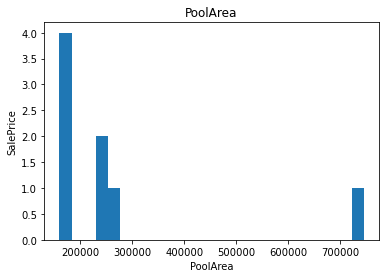

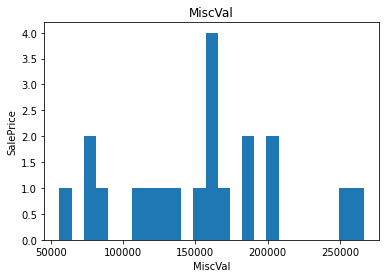

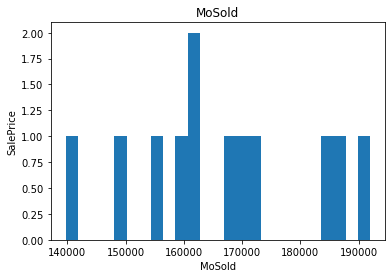

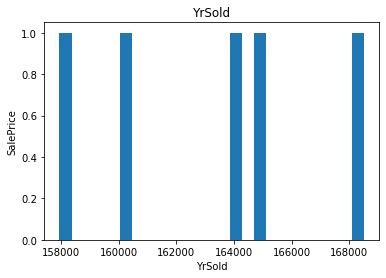

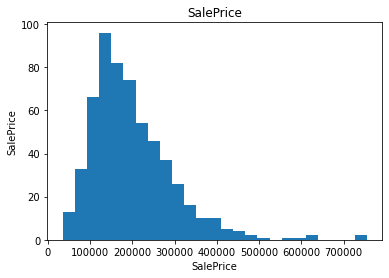

In [20]:
#plotting histogram for the continuous data
for feature in continuous_data:
    data1=data.copy()
    data.groupby(feature)['SalePrice'].median().plot.hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

So the data distributed is not normal in all of the numerical features where we can see some skewness.

In [21]:
#summary statistics
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


observations:
    
        1.Mean is greater than median in features like MSSubClass, MasVnrArea,BsmtFinSF1,BsmtFinSF2 and soon.
        2.There is a huge difference between 75th percentile and the maximum value in the features like MSSubClass,LotFrontage,LotArea etc.
        3.So the observations 1 and 2 suggests that there is a possibly very high outliers. we will examine and remove it in further process.

Let us check the correlation of the varaibles with the target feature. 

# Correlation:

In [22]:
corr=data.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.365220,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.027868,-0.052236,-0.062403,...,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.365220,1.000000,0.557257,0.247809,-0.053345,0.118554,0.096050,0.202225,0.247780,0.002514,...,0.101751,0.167092,0.023118,0.059508,0.033111,0.223429,-0.004559,0.025046,-0.004296,0.341294
LotArea,-0.124151,0.557257,1.000000,0.107188,0.017513,0.005506,0.027228,0.121448,0.221851,0.056656,...,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249499
OverallQual,0.070462,0.247809,0.107188,1.000000,-0.083167,0.575800,0.555945,0.409163,0.219643,-0.040893,...,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.789185
OverallCond,-0.056978,-0.053345,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.137882,-0.028810,0.044336,...,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.065642
YearBuilt,0.023988,0.118554,0.005506,0.575800,-0.377731,1.000000,0.592829,0.323006,0.227933,-0.027682,...,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,0.056618,0.096050,0.027228,0.555945,0.080669,0.592829,1.000000,0.181869,0.114430,-0.044694,...,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,0.027868,0.202225,0.121448,0.409163,-0.137882,0.323006,0.181869,1.000000,0.267066,-0.065723,...,0.151978,0.131850,-0.102321,0.018721,0.046509,0.013590,-0.027583,0.013432,-0.013493,0.466386
BsmtFinSF1,-0.052236,0.247780,0.221851,0.219643,-0.028810,0.227933,0.114430,0.267066,1.000000,-0.052145,...,0.192939,0.108802,-0.082351,0.025485,0.033490,0.154769,0.008314,0.007482,0.005614,0.362874
BsmtFinSF2,-0.062403,0.002514,0.056656,-0.040893,0.044336,-0.027682,-0.044694,-0.065723,-0.052145,1.000000,...,0.094690,-0.014103,0.032081,-0.031263,0.076561,0.045990,0.007915,-0.014605,0.038438,-0.010151


<AxesSubplot:>

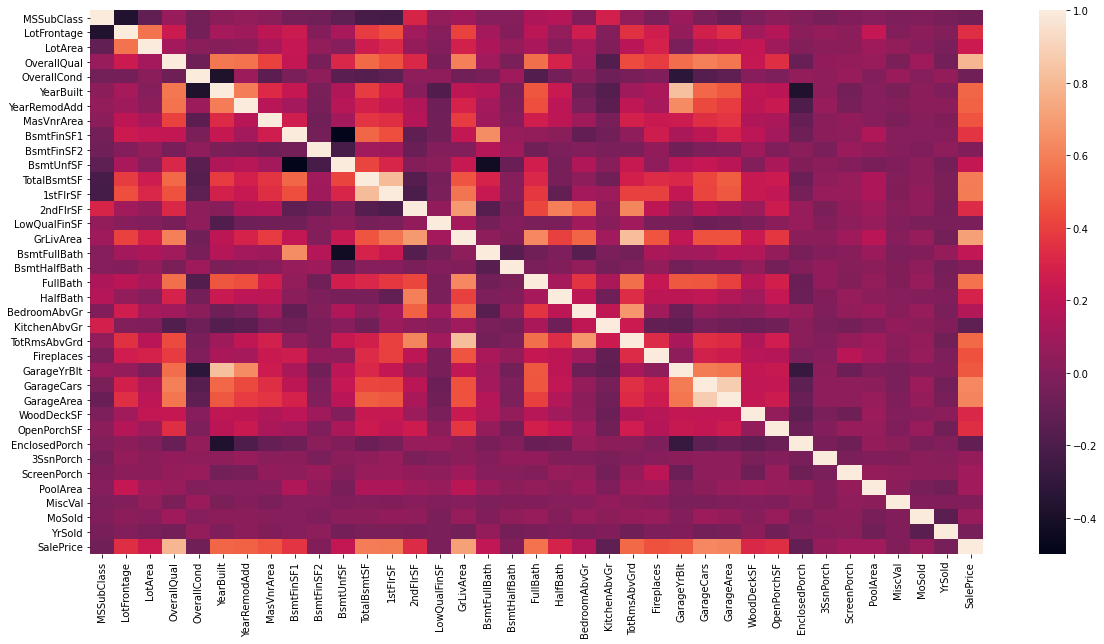

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(corr)

As we have dropped some of the features we can see that the target column is not having a negative correlation with any of the existing feature and it has a positive relation with OverallQual.

# Plotting Outliers:

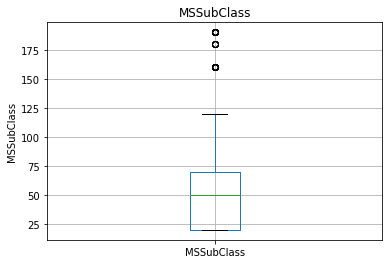

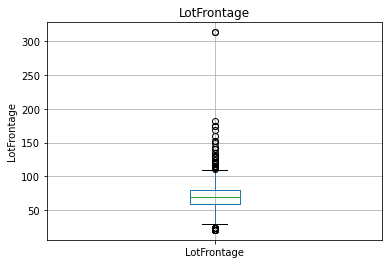

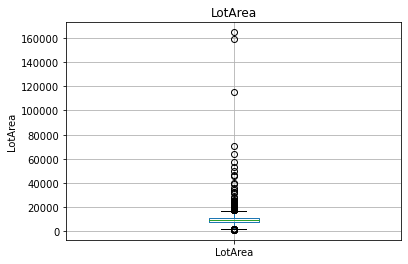

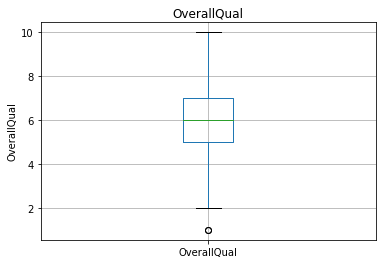

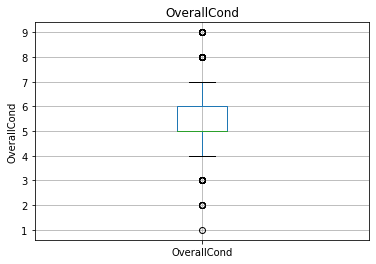

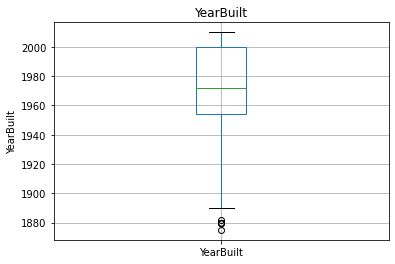

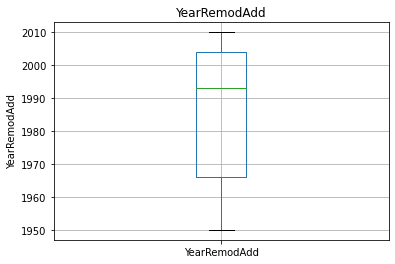

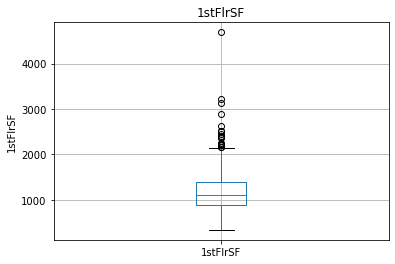

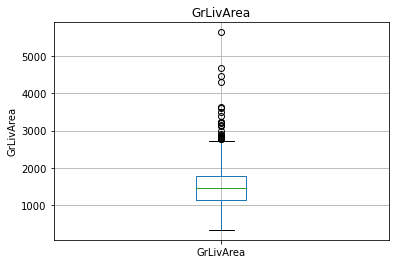

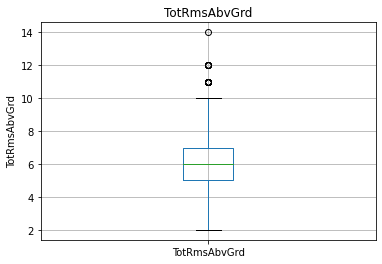

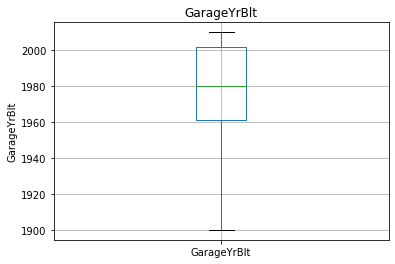

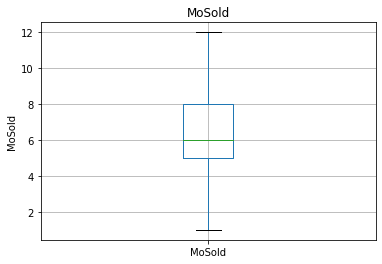

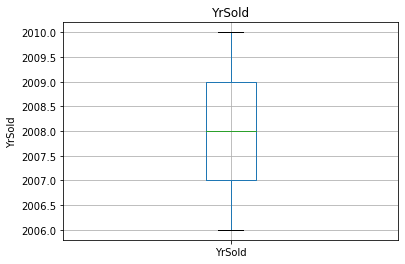

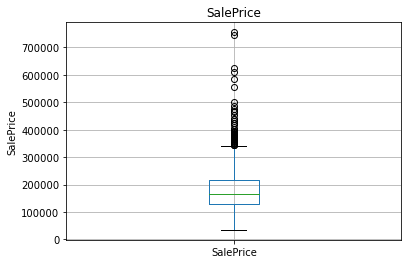

In [25]:
for feature in continuous_data:
    data1=data.copy()
    if 0 in data1[feature].unique():
        pass
    else:
        data1[feature]=np.log(data1[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Removing Outliers:

In [167]:
#using zscore to remove the outliers
z=np.abs(zscore(data[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','1stFlrSF',
                     'GrLivArea','TotRmsAbvGrd','GarageYrBlt','MoSold','YrSold','SalePrice']]))
threshold=3
print(np.where(z>3))
data_new=data[(z<3).all(axis=1)]
print(z)

(array([  27,   32,   48,   68,   72,   78,  103,  103,  103,  103,  113,
        119,  127,  141,  141,  141,  153,  184,  192,  192,  192,  210,
        232,  232,  241,  241,  245,  273,  299,  300,  305,  305,  305,
        356,  361,  361,  361,  362,  363,  369,  389,  389,  394,  395,
        401,  403,  413,  423,  423,  452,  488,  504,  504,  515,  517,
        521,  553,  561,  572,  581,  582,  590,  592,  592,  592,  592,
        600,  602,  611,  614,  614,  614,  615,  625,  642,  650,  655,
        689,  691,  691,  691,  705,  713,  723,  762,  769,  797,  804,
        821,  830,  833,  839,  839,  846,  846,  858,  867,  882,  884,
        914,  966,  980, 1032, 1038, 1039, 1049, 1074, 1082, 1102, 1104,
       1120, 1123, 1123, 1142, 1144], dtype=int64), array([ 4,  9,  3,  7,  0, 13,  4,  8,  9, 13,  2,  2,  0,  7,  8, 13,  4,
        0,  4,  5,  8,  0,  8, 13,  7, 13,  2,  8,  5, 13,  7,  8, 13,  2,
        2,  7,  8,  0,  0, 13,  0,  4, 13,  4,  4,  0,  0,  9, 13, 

# Feature Engineering:

# Handling Missing Values

Now let us handle the missing values.

<AxesSubplot:>

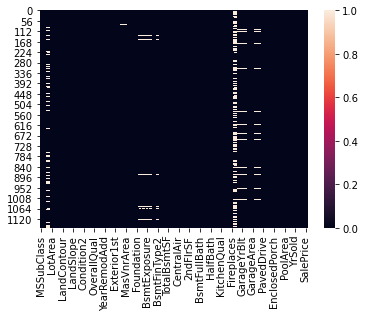

In [27]:
sns.heatmap(data.isnull())

So we can see the missing values through the above graph let us try to fill those missing values.

In [168]:
#filling the missing values of continuous data using mean value
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['GarageYrBlt']=data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean())
data['MasVnrArea']=data['MasVnrArea'].fillna(data['MasVnrArea'].mean())

In [169]:
#filling the missing values of categorical data using mode
data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])
data['FireplaceQu']=data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])

<AxesSubplot:>

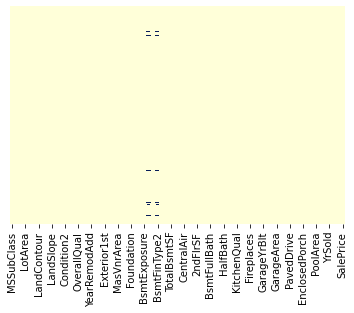

In [170]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [171]:
data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])

<AxesSubplot:>

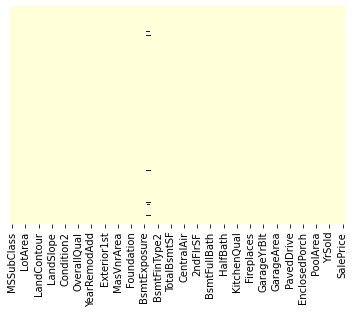

In [172]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

Still we have leftout with some missing values so we will drop those null values.

In [173]:
data.dropna(inplace=True)

<AxesSubplot:>

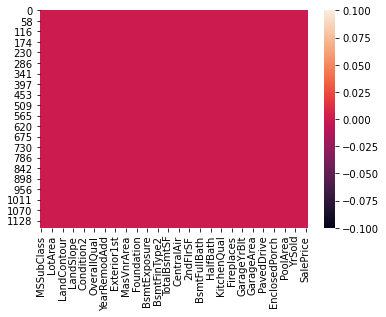

In [34]:
sns.heatmap(data.isnull())

So now we can see that our data doesnot contains any missing values.

In [174]:
data.drop('GarageYrBlt',axis=1,inplace=True)

In [175]:
data.shape

(1138, 75)

We have analyzed the train data. Now let's proceed to analyze the test data.

# Testing set:

In [176]:
test_data=pd.read_csv("test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


similar to training it has all the features except SalePrice.

In [177]:
test_data.shape

(292, 80)

The testing set consists of 292 rows and 80 features except the target feature SalePrice.

In [178]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

Let us perform the similar kind of operations done on training set to the testing set.

In [40]:
features_with_nan=[features for features in test_data.columns if test_data[features].isnull().sum()>1]

for feature in features_with_nan:
    print(feature,np.round(test_data[feature].isnull().mean(),3), '% missing values')

LotFrontage 0.154 % missing values
Alley 0.952 % missing values
BsmtQual 0.024 % missing values
BsmtCond 0.024 % missing values
BsmtExposure 0.024 % missing values
BsmtFinType1 0.024 % missing values
BsmtFinType2 0.024 % missing values
FireplaceQu 0.476 % missing values
GarageType 0.058 % missing values
GarageYrBlt 0.058 % missing values
GarageFinish 0.058 % missing values
GarageQual 0.058 % missing values
GarageCond 0.058 % missing values
PoolQC 1.0 % missing values
Fence 0.849 % missing values
MiscFeature 0.966 % missing values


In [179]:
#deleting some of the rows which are not required
test_data.drop(['Alley','Fence','MiscFeature','PoolQC','Id'],axis=1,inplace=True)
test_data.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
287,20,RL,78.0,10206,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,99,0,0,0,0,0,10,2008,WD,Normal
288,20,RL,57.0,9245,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2008,WD,Normal
289,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,700,3,2010,WD,Normal
290,50,RM,50.0,5000,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,24,36,0,0,0,0,10,2006,WD,Normal
291,160,RM,21.0,1953,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal


Handling the missing values:

In [180]:
#using mean to fill nan values of the numerical features in testing data
test_data['LotFrontage']=test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())
test_data['GarageYrBlt']=test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].mean())
test_data['MasVnrArea']=test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean())

In [181]:
#using mode to fill the nan values of the categorical features in the testing data
test_data['MasVnrType']=test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0])
test_data['BsmtQual']=test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0])
test_data['BsmtCond']=test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode()[0])
test_data['BsmtExposure']=test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].mode()[0])
test_data['GarageType']=test_data['GarageType'].fillna(test_data['GarageType'].mode()[0])
test_data['GarageFinish']=test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode()[0])
test_data['GarageQual']=test_data['GarageQual'].fillna(test_data['GarageQual'].mode()[0])
test_data['GarageCond']=test_data['GarageCond'].fillna(test_data['GarageCond'].mode()[0])
test_data['FireplaceQu']=test_data['FireplaceQu'].fillna(test_data['FireplaceQu'].mode()[0])
test_data['BsmtFinType1']=test_data['BsmtFinType1'].fillna(test_data['BsmtFinType1'].mode()[0])
test_data['BsmtFinType2']=test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode()[0])
test_data['Electrical']=test_data['Electrical'].fillna(test_data['Electrical'].mode()[0])

In [182]:
test_data.drop('GarageYrBlt',axis=1,inplace=True)

# Encoding:

Before encoding we will concate the testing and training data in row wise inorder to avoid the mismatch in the number of features after encoding.

In [183]:
df=pd.concat([data,test_data],axis=0,ignore_index=True) #concatenating test and train data
df.shape

(1430, 75)

In [184]:
df=pd.get_dummies(df) #encoding using get_dummies function
df.shape

(1430, 272)

Since we have concatenated test and train set for encoding purpose, now we will separate them again.

In [185]:
df_train=df.iloc[:1138,:]
df_test=df.iloc[1138:,:]
print("shape of new dataframes-{},{}".format(df_train.shape, df_test.shape))

shape of new dataframes-(1138, 272),(292, 272)


Now we can see that the train data and the test data are having same number of features(columns i.e.,272)

Since df_test data has completely null value in the target feature(SalePrice) we will drop that feature from the separated test set.

In [187]:
df_test.drop(['SalePrice'],axis=1,inplace=True)

In [188]:
df_test.shape

(292, 271)

So we can observe now the number rows in the original test set and separated test set are same that is we are proceeding in a right way.

In [189]:
x_train=df_train.drop(['SalePrice'],axis=1)
y_train=df_train['SalePrice']

# Feature Selection:

In [50]:
#using MinMaxScaler to scale the data
scaler=MinMaxScaler()
scaled=scaler.fit_transform(df)
scaled

array([[0.58823529, 0.17119339, 0.02220862, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.25342466, 0.08915891, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.24315068, 0.0527669 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.82352941, 0.01027397, 0.00599902, ..., 0.        , 1.        ,
        0.        ],
       [0.29411765, 0.09931507, 0.04407444, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.17119339, 0.04016283, ..., 0.        , 1.        ,
        0.        ]])

In [190]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.model_selection import cross_val_score

# Using Regression Models:

# 1.XGBoost Regressor:

In [64]:
import xgboost as xgb 
xg=xgb.XGBRegressor()
xg.fit(x_train,y_train)
pred_xg=xg.predict(df_test)
result_xg=xg.score(x_train,y_train)*100
print(result_xg)

80.89542732313481


In [65]:
#printing errors
print("error:")

print('Mean absolute error:', mean_absolute_error(y_test,pred_xg))
print('Mean squared error:', mean_squared_error(y_test,pred_xg))

print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_xg)))

error:
Mean absolute error: 21017.401829769737
Mean squared error: 1461554059.0141828
Root mean squared error: 38230.27673211617


In [66]:
#r2_score
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_xg)*100)

80.89542732313481


Text(0, 0.5, 'Predictions')

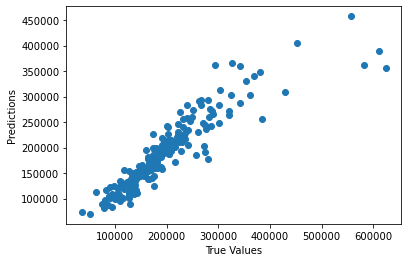

In [67]:
#plotting a graph
plt.scatter(y_test,pred_xg)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# 2. Ridge Regressor:

In [68]:
ridge=Ridge()
ridge.fit(x_train,y_train)
pred_ridge=ridge.predict(df_test)
result_ridge=ridge.score(x_train,y_train)*100
print(result_ridge)

85.70229112183377


In [69]:
#printing errors
print("error:")

print('Mean absolute error:', mean_absolute_error(y_test,pred_ridge))
print('Mean squared error:', mean_squared_error(y_test,pred_ridge))

print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_ridge)))

error:
Mean absolute error: 20381.685797418704
Mean squared error: 1093815328.8710923
Root mean squared error: 33072.879053252866


In [70]:
#r2_score
print(r2_score(y_test,pred_ridge)*100)

85.70229112183377


Text(0, 0.5, 'Predictions')

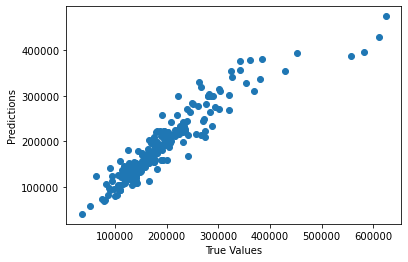

In [71]:
#plotting a graph(scatter)
plt.scatter(y_test,pred_ridge)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# 3. Decision Tree Regressor:

In [72]:
#from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt=dt.predict(df_test)
result_dt=dt.score(x_train,y_train)*100
print(result_dt)

77.0671270122793


In [73]:
#printing errors
print("error:")

print('Mean absolute error:', mean_absolute_error(y_test,pred_dt))
print('Mean squared error:', mean_squared_error(y_test,pred_dt))

print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_dt)))

error:
Mean absolute error: 28001.754385964912
Mean squared error: 1754429903.6140351
Root mean squared error: 41885.91533694871


In [74]:
#r2_score
print(r2_score(y_test,pred_dt)*100)

77.0671270122793


Text(0, 0.5, 'Predictions')

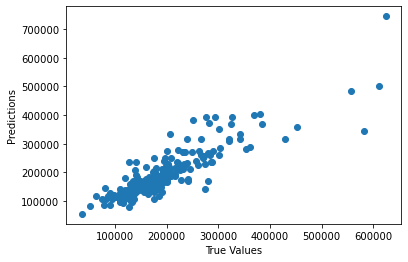

In [75]:
#plotting a graph
plt.scatter(y_test,pred_dt)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# 4. Gradient Boost Regressor:

In [76]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
pred_gbr=gbr.predict(df_test)
result_gbr=gbr.score(x_train,y_train)*100
print(result_gbr)

89.26358647520759


In [77]:
#printing errors
print("error:")

print('Mean absolute error:', mean_absolute_error(y_test,pred_gbr))
print('Mean squared error:', mean_squared_error(y_test,pred_gbr))

print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_gbr)))

error:
Mean absolute error: 16639.922393377175
Mean squared error: 821366121.7043223
Root mean squared error: 28659.485719466815


In [78]:
#r2_score
print(r2_score(y_test,pred_gbr)*100)

89.26358647520759


Text(0, 0.5, 'Predictions')

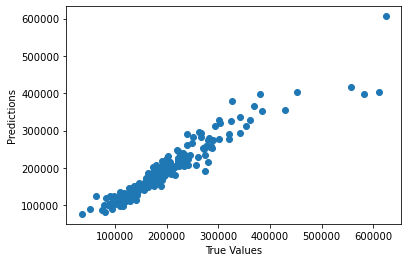

In [79]:
#plotting a graph
plt.scatter(y_test,pred_gbr)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# 5. Random Forest Regressor:

In [80]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred_rf=rf.predict(df_test)
print(rf.score(x_train,y_train)*100)

88.09775774133841


In [81]:
#printing errors
print("error:")

print('Mean absolute error:', mean_absolute_error(y_test,pred_rf))
print('Mean squared error:', mean_squared_error(y_test,pred_rf))

print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_rf)))

error:
Mean absolute error: 16942.786228070177
Mean squared error: 910555330.3258394
Root mean squared error: 30175.40936467705


In [82]:
#r2_score
print(r2_score(y_test,pred_rf)*100)

88.09775774133841


Text(0, 0.5, 'Predictions')

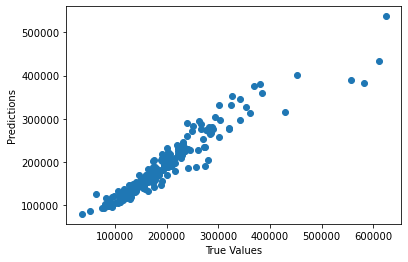

In [83]:
#plotting a graph
plt.scatter(y_test, pred_rf)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Cross Validation score:

In [85]:
print(cross_val_score(xg,x_train,y_train,cv=5).mean()*100)

81.58504302577707


In [86]:
print(cross_val_score(ridge,x_train,y_train,cv=5).mean()*100)

78.81546048944786


In [210]:
print(cross_val_score(dt,x_train,y_train,cv=5).mean()*100)

69.77692089563739


In [88]:
print(cross_val_score(gbr,x_train,y_train,cv=5).mean()*100)

88.03619035660142


In [89]:
print(cross_val_score(rf,x_train,y_train,cv=5).mean()*100)

83.97212279500528


We can see that all the regression models are giving a good accuracy despite of having large number of errors, and the Gradient Boosting Regressor is giving the highest accuracy when compare to other models and also cross validation score is also almost same so we will choose that model for further tuning and evaluating.

# Hyper parameter tuning:

In [90]:
from sklearn.model_selection import GridSearchCV  #using gridsearch for tuning

In [91]:
#passing five hyper parameters for tuning
parameters={"max_features":[None,'sqrt','auto'],
           "n_estimators":[100,200],
           "max_depth":[3,6],                         #these are the parameters corresponding to the Gradient Boosting Regressor
           "subsample":[1.0],
           "criterion":['friedman_mse','mse']}
grid=GridSearchCV(estimator=gbr, param_grid=parameters,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'max_depth': [3, 6],
                         'max_features': [None, 'sqrt', 'auto'],
                         'n_estimators': [100, 200], 'subsample': [1.0]})

In [92]:
#obtaining the best score
(grid.best_score_)*100     

86.24858965608297

This is the best score on train data.

In [93]:
#finding best parameters
print(grid.best_params_)

{'criterion': 'mse', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 1.0}


In [94]:
#using new parameters and checking the score 
clf=GradientBoostingRegressor(max_features='sqrt',criterion='mse',max_depth=3,subsample=1.0,n_estimators=100)
clf.fit(x_train,y_train)

GradientBoostingRegressor(criterion='mse', max_features='sqrt')

In [95]:
clf.score(x_test,y_test)*100

86.69965928858988

# Further Evaluation:

In [96]:
Final_mod = GradientBoostingRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(df_test)
print((r2_score(y_test,pred)*100))

89.26358647520759


# Model Saving:

In [97]:
import pickle
filename = 'Finalmodel.pkl'
pickle.dump(Final_mod, open(filename,"wb"))
print("Model saved")

Model saved


# Conclusion:

Now let us obtain the predicted prices using gradient boosting regressor.

In [195]:
y_pred=gbr.predict(df_test)

In [196]:
y_pred

array([359845.15662568, 220056.72532753, 239560.85534143, 187317.80234587,
       209276.22584856,  85705.73349938, 128073.39596665, 330193.32148411,
       234744.0152489 , 163493.61306892,  77148.04103122, 137031.16287779,
       122016.39841786, 190780.16098672, 287261.55203252, 119463.88889523,
       112835.79757491, 119317.44045394, 156017.9914374 , 190541.86771775,
       148700.7591677 , 144655.43875392, 146779.97815482,  76648.92636449,
       102798.26871784, 123449.92609457, 174999.14429635, 146741.13275062,
       165300.08578594,  89698.6755054 , 139022.06470759, 189206.56291092,
       211375.19812563, 164592.38068881, 111202.40576096, 168685.66591923,
       190608.25838696, 112508.72917239, 161737.61689922, 148640.3679874 ,
        95498.79796049, 320216.11070967, 198510.57188808, 186563.27203533,
       132633.61255717, 122698.76805931, 134751.74799747,  99550.47642423,
       200415.17306968, 323374.24797615, 142067.85031618, 212150.95191931,
        91072.05117462, 1

In [197]:
len(y_pred)  #obtaining the length of finded output on testing data

292

These are the SalePrice finded on testing data.

We have performed all the operations on training data and sent testing data to predict the result. Thus we obtained the result above.

Let us frame a dataframe for the predicted output.

In [216]:
#creating dataframe for the above predicted values
dataframe=pd.DataFrame(y_pred)
dataframe

,0
0,359845.156626
1,220056.725328
2,239560.855341
3,187317.802346
4,209276.225849
...,...
287,242043.373047
288,132471.596249
289,154017.652579
290,151789.223078


Finally we obtained a good model with the accuracy of training and testing data of 89% and 86% respectively by using the Gradient Boosting Regressor model. So it is the best fit for the present dataset. 
And we have predicted the house price of the testing data with the help of regression models.